# DecisionTree

### Mix

In [18]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('./data/etrain.csv')
test = pd.read_csv('./data/etest.csv')
validation = pd.read_csv('./data/evalidation.csv')
class_list = np.load('./class_list.npy')

train_target = train['target']
train = train.drop(columns = ['target'])
test_target = test['target']
test = test.drop(columns = ['target'])
validation_target = validation['target']
validation = validation.drop(columns = ['target'])
selected_feature = np.load('./selected_features.npy', allow_pickle=True)
train = train[selected_feature]
test = test[selected_feature]
validation = validation[selected_feature]

In [4]:
classifier = DecisionTreeClassifier()
param_dist = {
    'max_depth': range(3, 100),
    "max_features": range(1, 60),
}

tree_cv = RandomizedSearchCV(classifier, param_dist, cv=5, n_iter=100, n_jobs=-1)

tree_cv.fit(train, train_target)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [10]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_features': 50, 'max_depth': 8}
Best score is 0.7006166261007732


In [17]:
predict_target = tree_cv.predict(test)
validation_predict_target = tree_cv.predict(validation)
print(tree_cv.score(test, test_target))
print(tree_cv.score(validation, validation_target))
print(classification_report(test_target, predict_target))
print(classification_report(validation_target, validation_predict_target))

0.7121193886147551
0.7057319091319392
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2051
           1       0.58      0.64      0.61      2090
           2       0.65      0.60      0.62      2110
           3       0.86      0.82      0.84      2058

    accuracy                           0.71      8309
   macro avg       0.72      0.71      0.71      8309
weighted avg       0.72      0.71      0.71      8309

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1688
           1       0.59      0.63      0.61      1709
           2       0.61      0.60      0.60      1588
           3       0.85      0.78      0.82      1662

    accuracy                           0.71      6647
   macro avg       0.71      0.70      0.71      6647
weighted avg       0.71      0.71      0.71      6647



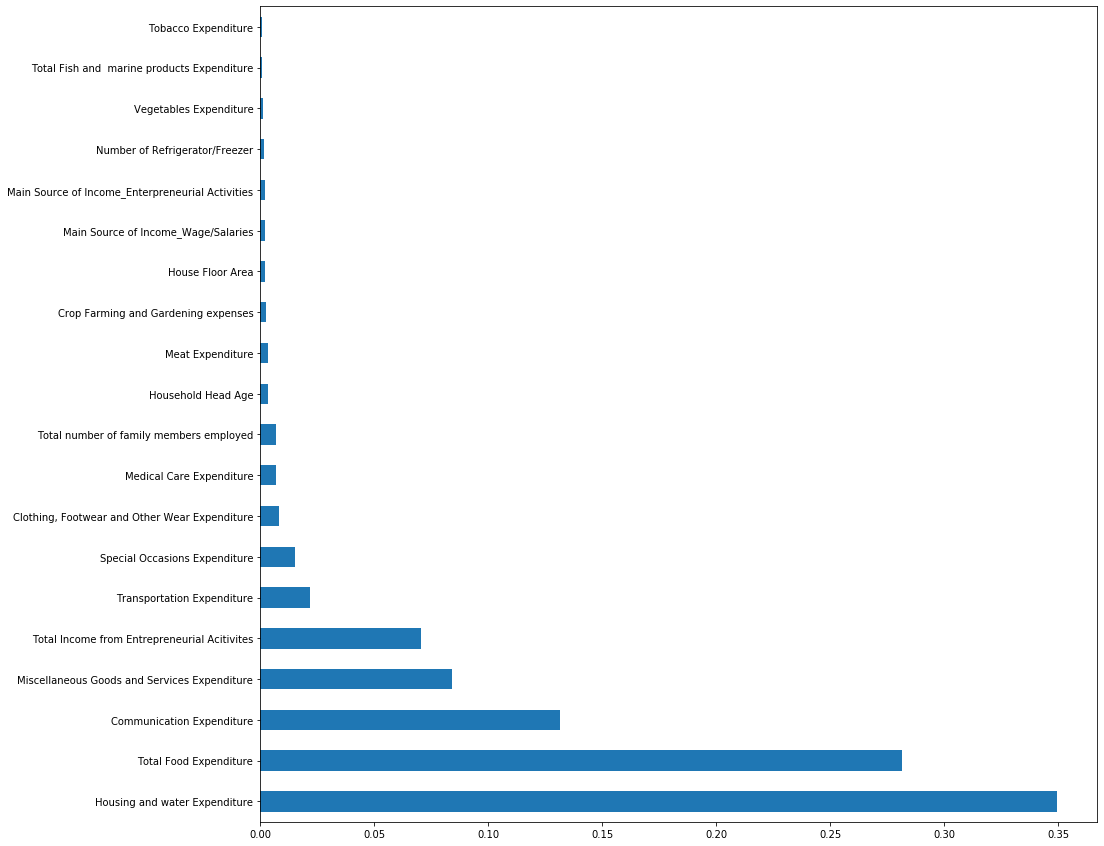

In [19]:
feat_importances = pd.Series(tree_cv.best_estimator_.feature_importances_, index=train.columns)
plt.figure(figsize=(15, 15))
f = feat_importances.nlargest(20)
f.plot(kind='barh')
plt.show()

### Only numeric features

In [151]:
train = pd.read_csv('./data/etrain.csv')
test = pd.read_csv('./data/etest.csv')
validation = pd.read_csv('./data/evalidation.csv')
numeric_feature = np.load('./numeric_features.npy')

train_target = train['target']
train = train.drop(columns = ['target'])
test_target = test['target']
test = test.drop(columns = ['target'])

train = train[numeric_feature]
test = test[numeric_feature]
validation = validation[numeric_feature]

In [152]:
classifier = DecisionTreeClassifier()
param_dist = {
    'max_depth': range(3, 100),
    "max_features": range(1, 60),
}

tree_cv = RandomizedSearchCV(classifier, param_dist, cv=5, n_iter=100, n_jobs=-1)

tree_cv.fit(train, train_target)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [153]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_features': 43, 'max_depth': 11}
Best score is 0.6991119828732734


In [154]:
predict_target = tree_cv.predict(test)
print(tree_cv.score(test, test_target))
print(classification_report(test_target, predict_target))

0.7000842459983151
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      2051
           1       0.57      0.64      0.60      2090
           2       0.62      0.60      0.61      2110
           3       0.86      0.78      0.81      2058

    accuracy                           0.70      8309
   macro avg       0.71      0.70      0.70      8309
weighted avg       0.71      0.70      0.70      8309



### Only Categorical

In [160]:
train = pd.read_csv('./data/etrain.csv')
test = pd.read_csv('./data/etest.csv')
validation = pd.read_csv('./data/evalidation.csv')
numeric_feature = np.load('./numeric_features.npy')

train_target = train['target']
train = train.drop(columns = ['target'])
test_target = test['target']
test = test.drop(columns = ['target'])

train = train.drop(columns=numeric_feature)
test = test.drop(columns=numeric_feature)
validation = validation.drop(columns=numeric_feature)

In [161]:
classifier = DecisionTreeClassifier()
param_dist = {
    'max_depth': range(3, 100),
    "max_features": range(1, 60),
}

tree_cv = RandomizedSearchCV(classifier, param_dist, cv=5, n_iter=100, n_jobs=-1)

tree_cv.fit(train, train_target)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [162]:
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'max_features': 47, 'max_depth': 13}
Best score is 0.44576518879780114


In [163]:
predict_target = tree_cv.predict(test)
print(tree_cv.score(test, test_target))
print(classification_report(test_target, predict_target))

0.44517992538211576
              precision    recall  f1-score   support

           0       0.49      0.56      0.52      2051
           1       0.34      0.29      0.32      2090
           2       0.34      0.29      0.32      2110
           3       0.55      0.65      0.59      2058

    accuracy                           0.45      8309
   macro avg       0.43      0.45      0.44      8309
weighted avg       0.43      0.45      0.44      8309

